# Code to try to explain Low Default Portfolio Analysis in Python



In [5]:
#Import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from scipy.stats import beta, binom


In [2]:
# test binomial distribution (100 companies, 10bps pd, 1000 draws)

customer_years = 1000
pd_bps = 13.9              # PD in basis points, 100 bps = 1%
pd_dec = pd_bps/10000   # PD as a decimal

rng = np.random.default_rng(2153)
res = rng.binomial(customer_years,pd_dec,10000) 



In [3]:
res.mean()

1.3901

In [4]:
#convert res to data frame and do value counts
res2 = pd.DataFrame({'res' : res})

res3 = res2['res'].value_counts()

res3.sort_index(inplace=True)

print(res3)

0    2515
1    3428
2    2402
3    1138
4     365
5     124
6      23
7       4
9       1
Name: res, dtype: int64


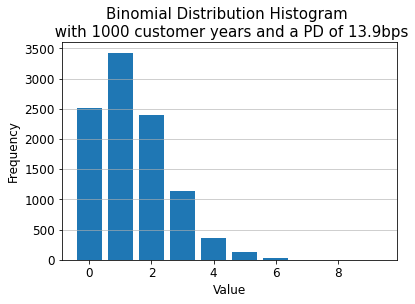

In [5]:
# Better plot
plt.bar(res3.index.values, res3)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

title1 = 'Binomial Distribution Histogram \n with ' + str(customer_years) + ' customer years and a PD of ' + str(pd_bps) + 'bps'
plt.title(title1,fontsize=15)
plt.show()

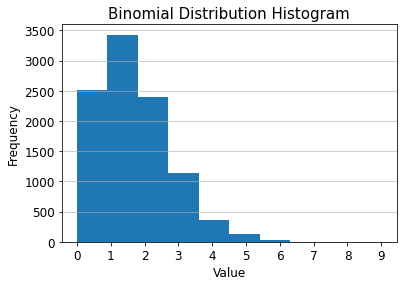

In [6]:
# Can plot histogram directly but doesn't look so good

fig, ax = plt.subplots(1,1)
plt.hist(res)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Binomial Distribution Histogram',fontsize=15)

tick_spacing = 1
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.show()

## Look at simple case where defaults are independent and we have observed no defaults

Then for a given PD p, the probability of getting 0 defaults from n customers is (1-p)^n.

Pluto and Tasche (2011) defines the (1 - $\alpha$)100%
confidence region for p as   
all the values of p that satisfy:  
$(1-p)^n \le 1 - \alpha$

In other words:  
- in simulations with the PD set to the 50% confidence upper bound we would get 0 defaults 50% of the time
- in simulations with the PD set to the 75% confidence upper bound we would get 0 defaults 25% of the time

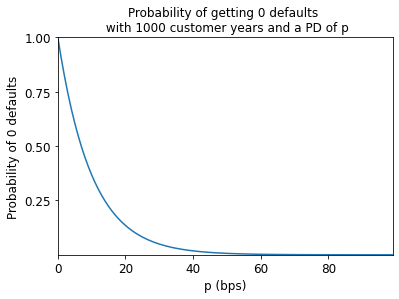

In [7]:
# with our customer_years

#probs on bps
p = np.arange(0,100,1)

#prob of 0 defaults
prob_0 = pow((1-p/10000),customer_years) # pow() is power function

# plot results
fig, ax = plt.subplots(1,1)

plt.xlim(min(p), max(p))
plt.ylim(min(prob_0), max(prob_0))

plt.plot(p, prob_0)
plt.xlabel('p (bps)',fontsize=12)
plt.ylabel('Probability of 0 defaults',fontsize=12)


plt.xticks(fontsize=12)

tick_spacing = 0.25
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.yticks(fontsize=12)

title2 = 'Probability of getting 0 defaults \n with ' + str(customer_years) + ' customer years and a PD of p'
plt.title(title2)
plt.show()

Re-arranging we get  
$p \le 1 - (1 - \alpha)^{1/n}$

So upper bounds for 50% and 75% confidence intervals for our example are:

In [8]:
# function to calculate Pluto Tasche upper bound when 0 defaults observed, no asset or time correlation 
def PT_0def(alpha, n):
    #alpha is the confidence interval
    #n is the number of observations
    return 1 - pow(1-alpha, 1/n) #PT upper bound PD as a decimal

c50 = PT_0def(0.5, customer_years)
c75 = PT_0def(0.75, customer_years)
print('With ' + str(customer_years) + ' customer years:', '\n50% upper bound = ' + str(round(c50 * 10000,1)) + 'bps', '\n75% upper bound = ' + str(round(c75 * 10000,1)) + 'bps')

With 1000 customer years: 
50% upper bound = 6.9bps 
75% upper bound = 13.9bps


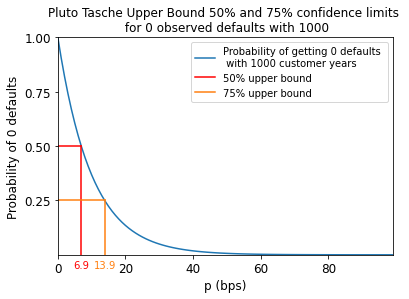

In [9]:
#add confidence intervals to plot
# plot results
fig, ax = plt.subplots(1,1)



ax.plot(p, prob_0, label='Probability of getting 0 defaults \n with ' + str(customer_years) + ' customer years')

plt.xlim(min(p), max(p))
plt.ylim(min(prob_0), max(prob_0))

#add confidence intervals
ax.plot([0, c50*10000], [0.5, 0.5], 'r', label='50% upper bound')
ax.plot([c50*10000, c50*10000], [0, 0.5], 'r')

ax.plot([0, c75*10000], [0.25, 0.25], 'tab:orange', label='75% upper bound')
ax.plot([c75*10000, c75*10000], [0, 0.25], 'tab:orange')

plt.xlabel('p (bps)',fontsize=12)
plt.ylabel('Probability of 0 defaults',fontsize=12)


plt.xticks(fontsize=12)

tick_spacing = 0.25
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.yticks(fontsize=12)

title3 = 'Pluto Tasche Upper Bound 50% and 75% confidence limits \n for 0 observed defaults with ' + str(customer_years)
plt.title(title3)
ax.legend()


#add annotations for confidence interval values
ax.annotate(str(round(c50 * 10000,1)),
            xy=(c50 * 10000,0), xycoords='data',
            xytext=(0, -15), textcoords='offset pixels', color='r',
            horizontalalignment='center',
            verticalalignment='bottom')
ax.annotate(str(round(c75 * 10000,1)),
            xy=(c75 * 10000,0), xycoords='data',
            xytext=(0, -15), textcoords='offset pixels', color='tab:orange',
            horizontalalignment='center',
            verticalalignment='bottom')

plt.show()

In [10]:
#function to plot histogram and show frequencies of simulated binomial
def bin_sim(customer_years, pd_dec, num_simulations, seed):
    # customer_years = number of observations
    # pd_dec = PD as a decimal
    # num_simulations = number of times to simulate
    # seed = seed to use for random generator
    
    pd_bps = pd_dec * 10000
    
    rng = np.random.default_rng(seed)
    res = rng.binomial(customer_years,pd_dec,num_simulations) 
    
    #convert res to data frame and do value counts
    res2 = pd.DataFrame({'res' : res})

    res3 = res2['res'].value_counts()

    res3.sort_index(inplace=True)

    print(res3)
    
    plt.bar(res3.index.values, res3/num_simulations)
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('Number of defaults in simulation',fontsize=12)
    plt.ylabel('Proportion of simulations',fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    title1 = 'Binomial Distribution Histogram \n with ' + str(customer_years) + ' customer years and a PD of ' + str(round(pd_bps,1)) + 'bps'
    plt.title(title1,fontsize=15)
    plt.show()



0    4982
1    3477
2    1197
3     279
4      50
5      11
6       3
7       1
Name: res, dtype: int64


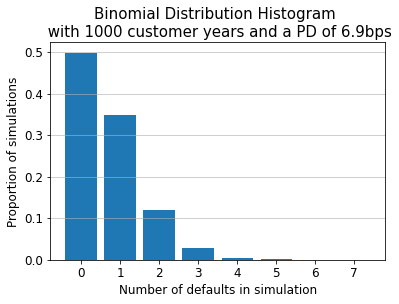

In [11]:
bin_sim(customer_years=1000,pd_dec=c50,num_simulations=10000, seed=2217)

0    2520
1    3443
2    2412
3    1094
4     389
5     104
6      24
7       9
8       4
9       1
Name: res, dtype: int64


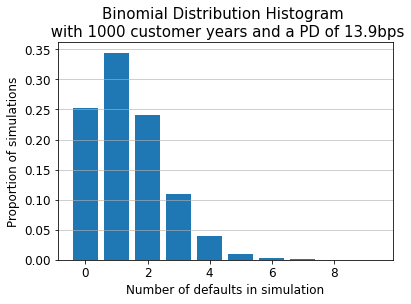

In [12]:
bin_sim(customer_years=1000,pd_dec=c75,num_simulations=10000, seed=2217)

## Introducing defaults
Once we introduce defaults, the Pluto Tasche upper bound PD estimate is where the probability of getting less than or equal to the observed defaults  equals one minus the confidence interval.  
If you have d defaults, n customers, pd of p and confidence interval of $\alpha$ then this is:  
  
  
${\sum_{k=0}^{d} \binom{n}{k} p^k(1-p)^{(n-k)}} = 1 - \alpha$  

  
The left hand side is the cumulative beta distribution with parameters (confidenceLevel, a=defaults+1, b=customers-defaults) (check). 



In [20]:
#help(beta.cdf)
customers_in = 1000
defaults_in = 0
print('Customers = ', customers_in, ' Defaults = ', defaults_in)
print('50% confidence LDP = ', beta.ppf(q=0.5, a=defaults_in+1,b=customers_in - defaults_in))
print('75% confidence LDP = ', beta.ppf(q=0.25, a=defaults_in+1,b=customers_in - defaults_in))
print()
customers_in = 1000
defaults_in = 1
print('Customers = ', customers_in, ' Defaults = ', defaults_in)
print('50% confidence LDP = ', beta.ppf(q=0.5, a=defaults_in+1,b=customers_in - defaults_in))
print('75% confidence LDP = ', beta.ppf(q=0.25, a=defaults_in+1,b=customers_in - defaults_in))

Customers =  1000  Defaults =  0
50% confidence LDP =  0.0006929070095464847
75% confidence LDP =  0.0002876406959319007

Customers =  1000  Defaults =  1
50% confidence LDP =  0.001677777865415342
75% confidence LDP =  0.0009612974591115491


In [15]:
# try a range of p's to see which give cumulative probabilities close to 0.5 and 0.75
# binom.cdf(k, n, p, loc=0)  # Cumulative distribution function: k = num defaults, n = customer years, p=pd, (loc is a shift, not needed)

p = np.arange(0,101,1)/10000

cum_prob = np.round_(binom.cdf(k=0, n=1000, p=p, loc=0),2)

res = pd.DataFrame({'p' : p, 'bps' : p*10000, 'cum_prob' : cum_prob})
print(res)



          p    bps  cum_prob
0    0.0000    0.0      1.00
1    0.0001    1.0      0.90
2    0.0002    2.0      0.82
3    0.0003    3.0      0.74
4    0.0004    4.0      0.67
..      ...    ...       ...
96   0.0096   96.0      0.00
97   0.0097   97.0      0.00
98   0.0098   98.0      0.00
99   0.0099   99.0      0.00
100  0.0100  100.0      0.00

[101 rows x 3 columns]


In [17]:
# if we want cum prob to be 1 - confidence interval we take one away from the other and want it to be as close to 0 as possible
alpha = 0.5
res['to_min'] = (res['cum_prob'] - (1 - alpha)) * (res['cum_prob'] - (1 - alpha)) # square the thing we want so we are always minimising a positive number
print(res.head(9))
x = res[res['to_min']==res['to_min'].min()]['bps'] # find the bps value which gives the minimum
print(x) # x is a series of 1 number
print(type(x))
print(x.iloc[0]) # this is just a single float value
print(type(x.iloc[0]))

        p  bps  cum_prob  to_min
0  0.0000  0.0      1.00  0.2500
1  0.0001  1.0      0.90  0.1600
2  0.0002  2.0      0.82  0.1024
3  0.0003  3.0      0.74  0.0576
4  0.0004  4.0      0.67  0.0289
5  0.0005  5.0      0.61  0.0121
6  0.0006  6.0      0.55  0.0025
7  0.0007  7.0      0.50  0.0000
8  0.0008  8.0      0.45  0.0025
7    7.0
Name: bps, dtype: float64
<class 'pandas.core.series.Series'>
7.0
<class 'numpy.float64'>


In [17]:
# function to take in customer years and defaults and confidence level and output LDP
def PT_LDP_0corr(defaults, customer_years, confidence_level, max_bps_test=1001):
    if(defaults==0):
        LDP_PD_dec = 1 - pow(1-confidence_level, 1/customer_years) #PT upper bound PD as a decimal
    else:
        # try a range of p's to see which give cumulative probabilities close to confidence interval
        # binom.cdf(k, n, p, loc=0)  # Cumulative distribution function: k = num defaults, n = customer years, p=pd, (loc is a shift, not needed)
        p = np.arange(0,max_bps_test*10,1)/100000 # list of pds to try
        cum_prob = binom.cdf(k=defaults, n=customer_years, p=p, loc=0) #cumulative probabilities
        res = pd.DataFrame({'p' : p, 'bps' : p*10000, 'cum_prob' : cum_prob})
        res['to_min'] = (res['cum_prob'] - (1 - confidence_level)) * (res['cum_prob'] - (1 - confidence_level))
        #print(res[res['to_min']==res['to_min'].min()])
        LDP_PD_dec = res[res['to_min']==res['to_min'].min()]['p'].iloc[0] # .iloc[0] just returns element as a number rather than a series
    #end if else
    
    #print('LDP PD as Decimal: ', round(LDP_PD_dec,5))
    #print('LDP PD as bps: ', round(LDP_PD_dec*10000,1))
    #print('')
    
    return LDP_PD_dec

    #print('')
    #print('')
#end function
    

In [18]:
PT_LDP_0corr(0, 1000, 0.5)

PT_LDP_0corr(1, 1000, 0.5)
PT_LDP_0corr(1, 1000, 0.75)
# matches R code

0.00269

To see conservatism we can show for different PDs the percentage of times the PT LDP upper bound would be less conservative than the true PD
But how conservative are they?

In [19]:
# with 1000 customers calculate LDP for 1 to 20 defaults


#tmp lists to use in for loop as quicker than dataframe
custs = []
defs = []
LDP_50 = []
LDP_75 = []

# loop through number of defaults
for d in np.arange(0,21,1):
    print(d)
    custs.append(1000)
    defs.append(d)
    LDP_50.append(PT_LDP_0corr(d, 1000, 0.5, max_bps_test=10000))
    LDP_75.append(PT_LDP_0corr(d, 1000, 0.75, max_bps_test=10000))
#end for

#store in dataframe
LDP_res = pd.DataFrame({'customers' : custs,'observed_defaults' : defs,'LDP_PD_50pc' : LDP_50,'LDP_PD_75pc' : LDP_75})

    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [20]:
print(LDP_res)
#LDP_res

    customers  observed_defaults  LDP_PD_50pc  LDP_PD_75pc
0        1000                  0     0.000693     0.001385
1        1000                  1     0.001680     0.002690
2        1000                  2     0.002670     0.003920
3        1000                  3     0.003670     0.005100
4        1000                  4     0.004670     0.006270
5        1000                  5     0.005670     0.007410
6        1000                  6     0.006670     0.008550
7        1000                  7     0.007670     0.009670
8        1000                  8     0.008670     0.010790
9        1000                  9     0.009670     0.011900
10       1000                 10     0.010660     0.013000
11       1000                 11     0.011660     0.014100
12       1000                 12     0.012660     0.015190
13       1000                 13     0.013660     0.016280
14       1000                 14     0.014660     0.017370
15       1000                 15     0.015660     0.0184

In [21]:
#For each PD work out what % of the time we would get each number of defaults 
# (it is the binomial probability)

#tmp lists
dl = []
nl = []
pl = []
bin_prob = []

for p in np.arange(1,201,1):
    for d in np.arange(0,21,1):
        nl.append(1000)
        dl.append(d)
        pl.append(p/10000)
        bin_prob.append(binom.pmf(d, 1000, p/10000))
    # end d loop
#end p loop

#store in dataframe
bin_res = pd.DataFrame({'customers' : nl,'observed_defaults' : dl, 'true_pd' : pl,'prob_of_defaults' : bin_prob})
print(bin_res.head(20))

    

    customers  observed_defaults  true_pd  prob_of_defaults
0        1000                  0   0.0001      9.048329e-01
1        1000                  1   0.0001      9.049234e-02
2        1000                  2   0.0001      4.520544e-03
3        1000                  3   0.0001      1.503985e-04
4        1000                  4   0.0001      3.749057e-06
5        1000                  5   0.0001      7.468869e-08
6        1000                  6   0.0001      1.238711e-09
7        1000                  7   0.0001      1.759146e-11
8        1000                  8   0.0001      2.183758e-13
9        1000                  9   0.0001      2.407228e-15
10       1000                 10   0.0001      2.385801e-17
11       1000                 11   0.0001      2.147436e-19
12       1000                 12   0.0001      1.770022e-21
13       1000                 13   0.0001      1.345351e-23
14       1000                 14   0.0001      9.485675e-26
15       1000                 15   0.000

In [22]:
bin_res.tail(40)

,customers,observed_defaults,true_pd,prob_of_defaults
4160,1000,2,0.0199,3.837868e-07
4161,1000,3,0.0199,2.592281e-06
4162,1000,4,0.0199,1.311897e-05
4163,1000,5,0.0199,5.306057e-05
4164,1000,6,0.0199,1.786596e-04
4165,1000,7,0.0199,5.151070e-04
4166,1000,8,0.0199,1.298193e-03
4167,1000,9,0.0199,2.905302e-03
4168,1000,10,0.0199,5.845849e-03
4169,1000,11,0.0199,1.068250e-02


In [23]:
# add in observed default rate
bin_res['ODR'] = bin_res['observed_defaults'] / bin_res['customers']
bin_res

,customers,observed_defaults,true_pd,prob_of_defaults,ODR
0,1000,0,0.0001,0.904833,0.000
1,1000,1,0.0001,0.090492,0.001
2,1000,2,0.0001,0.004521,0.002
3,1000,3,0.0001,0.000150,0.003
4,1000,4,0.0001,0.000004,0.004
...,...,...,...,...,...
4195,1000,16,0.0200,0.064555,0.016
4196,1000,17,0.0200,0.076257,0.017
4197,1000,18,0.0200,0.084990,0.018
4198,1000,19,0.0200,0.089646,0.019


In [24]:
# join to LDP results table
all_res = pd.merge(bin_res, LDP_res, how='left', on=['customers','observed_defaults'])
all_res

,customers,observed_defaults,true_pd,prob_of_defaults,ODR,LDP_PD_50pc,LDP_PD_75pc
0,1000,0,0.0001,0.904833,0.000,0.000693,0.001385
1,1000,1,0.0001,0.090492,0.001,0.001680,0.002690
2,1000,2,0.0001,0.004521,0.002,0.002670,0.003920
3,1000,3,0.0001,0.000150,0.003,0.003670,0.005100
4,1000,4,0.0001,0.000004,0.004,0.004670,0.006270
...,...,...,...,...,...,...,...
4195,1000,16,0.0200,0.064555,0.016,0.016660,0.019540
4196,1000,17,0.0200,0.076257,0.017,0.017660,0.020610
4197,1000,18,0.0200,0.084990,0.018,0.018660,0.021690
4198,1000,19,0.0200,0.089646,0.019,0.019660,0.022760


In [25]:
# look at true PD just above 50% LDP value for 0 defaults
all_res[all_res['true_pd']==0.0007]
# 49% have LDP < true PD

,customers,observed_defaults,true_pd,prob_of_defaults,ODR,LDP_PD_50pc,LDP_PD_75pc
126,1000,0,0.0007,4.964636e-01,0.000,0.000693,0.001385
127,1000,1,0.0007,3.477680e-01,0.001,0.001680,0.002690
128,1000,2,0.0007,1.216822e-01,0.002,0.002670,0.003920
129,1000,3,0.0007,2.835559e-02,0.003,0.003670,0.005100
130,1000,4,0.0007,4.950807e-03,0.004,0.004670,0.006270
131,1000,5,0.0007,6.908241e-04,0.005,0.005670,0.007410
132,1000,6,0.0007,8.024933e-05,0.006,0.006670,0.008550
133,1000,7,0.0007,7.982371e-06,0.007,0.007670,0.009670
134,1000,8,0.0007,6.940541e-07,0.008,0.008670,0.010790
135,1000,9,0.0007,5.358764e-08,0.009,0.009670,0.011900


In [26]:
# look at true PD just above 75% LDP value for 0 defaults
all_res[all_res['true_pd']==0.0014]
# 24.6% have LDP < true PD

,customers,observed_defaults,true_pd,prob_of_defaults,ODR,LDP_PD_50pc,LDP_PD_75pc
273,1000,0,0.0014,2.463552e-01,0.000,0.000693,0.001385
274,1000,1,0.0014,3.453808e-01,0.001,0.001680,0.002690
275,1000,2,0.0014,2.418634e-01,0.002,0.002670,0.003920
276,1000,3,0.0014,1.128018e-01,0.003,0.003670,0.005100
277,1000,4,0.0014,3.941736e-02,0.004,0.004670,0.006270
278,1000,5,0.0014,1.100813e-02,0.005,0.005670,0.007410
279,1000,6,0.0014,2.559303e-03,0.006,0.006670,0.008550
280,1000,7,0.0014,5.095027e-04,0.007,0.007670,0.009670
281,1000,8,0.0014,8.866296e-05,0.008,0.008670,0.010790
282,1000,9,0.0014,1.370086e-05,0.009,0.009670,0.011900


In [27]:
# just rows where LDP < true PD at 50%
all_res_LDP_lt_true_PD_50pc = all_res[all_res['LDP_PD_50pc'] < all_res['true_pd']]
all_res_LDP_lt_true_PD_50pc

,customers,observed_defaults,true_pd,prob_of_defaults,ODR,LDP_PD_50pc,LDP_PD_75pc
126,1000,0,0.0007,0.496464,0.000,0.000693,0.001385
147,1000,0,0.0008,0.449185,0.000,0.000693,0.001385
168,1000,0,0.0009,0.406405,0.000,0.000693,0.001385
189,1000,0,0.0010,0.367695,0.000,0.000693,0.001385
210,1000,0,0.0011,0.332670,0.000,0.000693,0.001385
...,...,...,...,...,...,...,...
4194,1000,15,0.0200,0.051382,0.015,0.015660,0.018450
4195,1000,16,0.0200,0.064555,0.016,0.016660,0.019540
4196,1000,17,0.0200,0.076257,0.017,0.017660,0.020610
4197,1000,18,0.0200,0.084990,0.018,0.018660,0.021690


In [28]:
# probability of LDP at 50% confidence being lower than true PD
LDP_lt_true_PD_50pc = all_res_LDP_lt_true_PD_50pc.groupby('true_pd').prob_of_defaults.sum().reset_index()
LDP_lt_true_PD_50pc.head(30)

,true_pd,prob_of_defaults
0,0.0007,0.496464
1,0.0008,0.449185
2,0.0009,0.406405
3,0.0010,0.367695
4,0.0011,0.332670
5,0.0012,0.300977
6,0.0013,0.272301
7,0.0014,0.246355
8,0.0015,0.222879
9,0.0016,0.201638


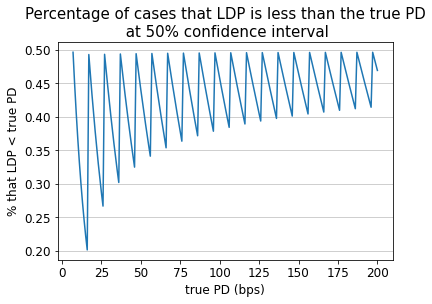

In [29]:
plt.plot(LDP_lt_true_PD_50pc['true_pd'].values*10000, LDP_lt_true_PD_50pc['prob_of_defaults'].values)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('true PD (bps)',fontsize=12)
plt.ylabel('% that LDP < true PD',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

title1 = 'Percentage of cases that LDP is less than the true PD\n at 50% confidence interval'
plt.title(title1,fontsize=15)
plt.show()

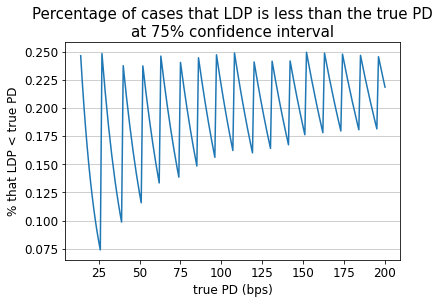

In [30]:
# Do the same thing for 75% confidence interval
# just rows where LDP < true PD at 75%
all_res_LDP_lt_true_PD_75pc = all_res[all_res['LDP_PD_75pc'] < all_res['true_pd']]
all_res_LDP_lt_true_PD_75pc

# add up probabilities by true_pd
LDP_lt_true_PD_75pc = all_res_LDP_lt_true_PD_75pc.groupby('true_pd').prob_of_defaults.sum().reset_index()
LDP_lt_true_PD_75pc.head(30)

#plot them
plt.plot(LDP_lt_true_PD_75pc['true_pd'].values*10000, LDP_lt_true_PD_75pc['prob_of_defaults'].values)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('true PD (bps)',fontsize=12)
plt.ylabel('% that LDP < true PD',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

title1 = 'Percentage of cases that LDP is less than the true PD\nat 75% confidence interval'
plt.title(title1,fontsize=15)
plt.show()

In [37]:
# with 10000 customers calculate LDP for 1 to 20 defaults


#tmp lists to use in for loop as quicker than dataframe
custs = []
defs = []
LDP_50 = []
LDP_75 = []

# loop through number of defaults
for d in np.arange(0,201,1):
    print(d)
    custs.append(10000)
    defs.append(d)
    LDP_50.append(PT_LDP_0corr(d, 10000, 0.5, max_bps_test=10000))
    LDP_75.append(PT_LDP_0corr(d, 10000, 0.75, max_bps_test=10000))
#end for

#store in dataframe
LDP_res = pd.DataFrame({'customers' : custs,'observed_defaults' : defs,'LDP_PD_50pc' : LDP_50,'LDP_PD_75pc' : LDP_75})


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200


In [38]:
LDP_res

,customers,observed_defaults,LDP_PD_50pc,LDP_PD_75pc
0,10000,0,0.000069,0.000139
1,10000,1,0.000170,0.000270
2,10000,2,0.000270,0.000390
3,10000,3,0.000370,0.000510
4,10000,4,0.000470,0.000630
...,...,...,...,...
196,10000,196,0.019670,0.020620
197,10000,197,0.019770,0.020720
198,10000,198,0.019870,0.020820
199,10000,199,0.019970,0.020920


In [45]:
#For each PD work out what % of the time we would get each number of defaults 
# (it is the binomial probability)

#tmp lists
dl = []
nl = []
pl = []
bin_prob = []

for p in np.arange(1,2001,1):
    for d in np.arange(0,201,1):
        nl.append(10000)
        dl.append(d)
        pl.append(p/100000)
        bin_prob.append(binom.pmf(d, 10000, p/100000))
    # end d loop
#end p loop

#store in dataframe
bin_res = pd.DataFrame({'customers' : nl,'observed_defaults' : dl, 'true_pd' : pl,'prob_of_defaults' : bin_prob})
print(bin_res.head(20))


    customers  observed_defaults  true_pd  prob_of_defaults
0       10000                  0  0.00001      9.048370e-01
1       10000                  1  0.00001      9.048460e-02
2       10000                  2  0.00001      4.523823e-03
3       10000                  3  0.00001      1.507654e-04
4       10000                  4  0.00001      3.768043e-06
5       10000                  5  0.00001      7.533147e-08
6       10000                  6  0.00001      1.254909e-09
7       10000                  7  0.00001      1.791670e-11
8       10000                  8  0.00001      2.238042e-13
9       10000                  9  0.00001      2.484749e-15
10      10000                 10  0.00001      2.482537e-17
11      10000                 11  0.00001      2.254618e-19
12      10000                 12  0.00001      1.876800e-21
13      10000                 13  0.00001      1.441974e-23
14      10000                 14  0.00001      1.028653e-25
15      10000                 15  0.0000

In [46]:
# join to LDP results table
all_res = pd.merge(bin_res, LDP_res, how='left', on=['customers','observed_defaults'])
all_res

,customers,observed_defaults,true_pd,prob_of_defaults,LDP_PD_50pc,LDP_PD_75pc
0,10000,0,0.00001,0.904837,0.000069,0.000139
1,10000,1,0.00001,0.090485,0.000170,0.000270
2,10000,2,0.00001,0.004524,0.000270,0.000390
3,10000,3,0.00001,0.000151,0.000370,0.000510
4,10000,4,0.00001,0.000004,0.000470,0.000630
...,...,...,...,...,...,...
401995,10000,196,0.02000,0.027609,0.019670,0.020620
401996,10000,197,0.02000,0.028041,0.019770,0.020720
401997,10000,198,0.02000,0.028333,0.019870,0.020820
401998,10000,199,0.02000,0.028481,0.019970,0.020920


In [47]:
# just rows where LDP < true PD at 50%
all_res_LDP_lt_true_PD_50pc = all_res[all_res['LDP_PD_50pc'] < all_res['true_pd']]
all_res_LDP_lt_true_PD_50pc

,customers,observed_defaults,true_pd,prob_of_defaults,LDP_PD_50pc,LDP_PD_75pc
1206,10000,0,0.00007,0.496573,0.000069,0.000139
1407,10000,0,0.00008,0.449315,0.000069,0.000139
1608,10000,0,0.00009,0.406553,0.000069,0.000139
1809,10000,0,0.00010,0.367861,0.000069,0.000139
2010,10000,0,0.00011,0.332851,0.000069,0.000139
...,...,...,...,...,...,...
401994,10000,195,0.02000,0.027043,0.019570,0.020510
401995,10000,196,0.02000,0.027609,0.019670,0.020620
401996,10000,197,0.02000,0.028041,0.019770,0.020720
401997,10000,198,0.02000,0.028333,0.019870,0.020820


In [48]:
# probability of LDP at 50% confidence being lower than true PD
LDP_lt_true_PD_50pc = all_res_LDP_lt_true_PD_50pc.groupby('true_pd').prob_of_defaults.sum().reset_index()
LDP_lt_true_PD_50pc.head(30)

,true_pd,prob_of_defaults
0,0.00007,0.496573
1,0.00008,0.449315
2,0.00009,0.406553
3,0.00010,0.367861
4,0.00011,0.332851
5,0.00012,0.301173
6,0.00013,0.272509
7,0.00014,0.246573
8,0.00015,0.223105
9,0.00016,0.201871


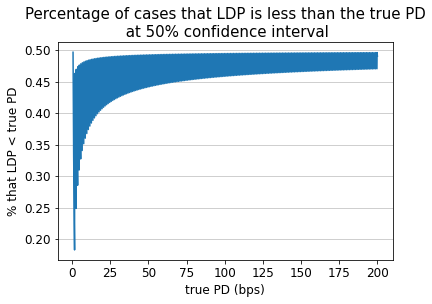

In [49]:
plt.plot(LDP_lt_true_PD_50pc['true_pd'].values*10000, LDP_lt_true_PD_50pc['prob_of_defaults'].values)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('true PD (bps)',fontsize=12)
plt.ylabel('% that LDP < true PD',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

title1 = 'Percentage of cases that LDP is less than the true PD\n at 50% confidence interval'
plt.title(title1,fontsize=15)
plt.show()